PROJECT: CANNABIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. LOAD THE DATA SET INTO A PANDAS DATAFRAME.

In [2]:
df = pd.read_csv('leafly_strain_data.csv')
df.head()

,name,img_url,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,...,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
0,GG4,https://images.leafly.com/flower-images/gg-4.jpg,Hybrid,20%,Caryophyllene,"Original Glue (GG4), developed by GG Strains, ...",66%,54%,51%,39%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
1,Wedding Cake,https://images.leafly.com/flower-images/weddin...,Hybrid,22%,Limonene,Wedding Cake is a potent indica-hybrid marijua...,60%,50%,41%,35%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
2,Runtz,https://images.leafly.com/flower-images/runtz-...,Hybrid,19%,Limonene,Runtz is a rare hybrid marijuana strain by Coo...,47%,62%,48%,43%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
3,Gelato,https://images.leafly.com/flower-images/gelato...,Hybrid,17%,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana ...",54%,49%,46%,37%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4,Blue Dream,https://images.leafly.com/flower-images/blue-d...,Hybrid,18%,Myrcene,Blue Dream is a sativa-dominant hybrid marijua...,48%,57%,52%,48%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


2. CLEAR/CONVERT MISSING DATA.

  FOR THE SAKE OF CLEANLINESS, LET'S GET RID OF THE IMG URL AND CHECK IF THERE ARE ANY MISSING VALUES IN THE DATASET

  

In [3]:
# Drop the img_url column
df.drop('img_url', axis=1, inplace=True)
# Check for missing values
df.isnull().sum()


name                      0
type                    655
thc_level              2027
most_common_terpene    2315
description              35
                       ... 
parkinson's               0
tourette's_syndrome       0
alzheimer's               0
hiv/aids                  0
tinnitus                  0
Length: 63, dtype: int64

THERE ARE STILL MISSING VALUES IN THE type, thc_level, most_common_terpene, and description COLUMNS.
LETS REPLACE ANY MISSING VALUES IN THOSE COLUMNS WITH A STRING THAT SAYS 'CURRENTLY UNKNOWN.'

In [4]:
# Replace missing values in Type, THC Level, and Most Common Terpene columns with 'Currently Unknown'
df['type'].fillna('Currently Unknown', inplace=True)
df['thc_level'].fillna('Currently Unknown', inplace=True)
df['most_common_terpene'].fillna('Currently Unknown', inplace=True)
df.isnull().sum()



name                    0
type                    0
thc_level               0
most_common_terpene     0
description            35
                       ..
parkinson's             0
tourette's_syndrome     0
alzheimer's             0
hiv/aids                0
tinnitus                0
Length: 63, dtype: int64

NEXT, LET'S REPLACE ANY MISSING VALUES IN THE description COLUMN WITH A STRING SAYING 'COMING SOON...'

In [5]:
# Replace missing values in Description column with 'Coming Soon...'
df['description'].fillna('Coming Soon...', inplace=True)
df.isnull().sum()

name                   0
type                   0
thc_level              0
most_common_terpene    0
description            0
                      ..
parkinson's            0
tourette's_syndrome    0
alzheimer's            0
hiv/aids               0
tinnitus               0
Length: 63, dtype: int64

THERE SHOULD BE NO MISSING VALUES LEFT. 

LET'S MOVE ON TO SEPARATING THE DATA INTO SMALLER DIFFERENT DATAFRAMES.
WE CAN CREATE DIFFERENT DATAFRAMES BASED ON THE type COLUMN. WE CAN USE THE groupby() METHOD TO GROUP THE STRAINS BY TYPE AND CREATE A SEPARATE DATAFRAME FOR EACH TYPE.

In [6]:
# Group strains by type and create separate dataframes for each type
indica_df = df.groupby('type').get_group('Indica')
sativa_df = df.groupby('type').get_group('Sativa')
hybrid_df = df.groupby('type').get_group('Hybrid')
unknown_df = df.groupby('type').get_group('Currently Unknown')
hybrid_df.head()


,name,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,sleepy,...,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
0,GG4,Hybrid,20%,Caryophyllene,"Original Glue (GG4), developed by GG Strains, ...",66%,54%,51%,39%,27%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
1,Wedding Cake,Hybrid,22%,Limonene,Wedding Cake is a potent indica-hybrid marijua...,60%,50%,41%,35%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
2,Runtz,Hybrid,19%,Limonene,Runtz is a rare hybrid marijuana strain by Coo...,47%,62%,48%,43%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
3,Gelato,Hybrid,17%,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana ...",54%,49%,46%,37%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4,Blue Dream,Hybrid,18%,Myrcene,Blue Dream is a sativa-dominant hybrid marijua...,48%,57%,52%,48%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


FINALLY...LET'S ANALYZE SOME OF THIS DATA.

LET'S FIND THE MIN, MAX, MEAN OF THE MOST POPULATED NUMERIC COLUMNS.

WE MUST CLEAN THE DATA EVEN FURTHER AND CONVERT THE PERCENTAGES TO NUMBERS. WE ALSO NEED TO DROP ANY ROWS WITH MISSING VALUES.

In [7]:
# Clean the data
df_cleaned = df[(df != 'Currently Unknown') &
                (df != 'Coming Soon...')].dropna()

# Remove the % sign and convert to integers
cols = ['thc_level', 'relaxed', 'happy', 'euphoric', 'uplifted', 'sleepy', 'dry_mouth', 'dry_eyes',
        'dizzy', 'paranoid', 'anxious', 'stress', 'pain', 'depression', 'anxiety', 'insomnia']
for col in cols:
    df_cleaned[col] = df_cleaned[col].str.replace('%', '').astype(float)

# Calculate the maximum, minimum, and average values for each column
max_values = df_cleaned[cols].max()
min_values = df_cleaned[cols].min()
avg_values = df_cleaned[cols].mean()

print("Maximum Values:")
print(max_values)
print("\nMinimum Values:")
print(min_values)
print("\nAverage Values:")
print(avg_values)


Maximum Values:
thc_level      34.0
relaxed       100.0
happy         100.0
euphoric      100.0
uplifted      100.0
sleepy        100.0
dry_mouth     100.0
dry_eyes      100.0
dizzy          66.0
paranoid       50.0
anxious       100.0
stress        100.0
pain          100.0
depression    100.0
anxiety       100.0
insomnia      100.0
dtype: float64

Minimum Values:
thc_level     6.0
relaxed       0.0
happy         0.0
euphoric      0.0
uplifted      0.0
sleepy        0.0
dry_mouth     0.0
dry_eyes      0.0
dizzy         0.0
paranoid      0.0
anxious       0.0
stress        0.0
pain          0.0
depression    0.0
anxiety       0.0
insomnia      0.0
dtype: float64

Average Values:
thc_level     18.470238
relaxed       45.775641
happy         43.881868
euphoric      34.844780
uplifted      32.691850
sleepy        12.249084
dry_mouth     18.373626
dry_eyes      10.078297
dizzy          3.900641
paranoid       2.788462
anxious        2.768315
stress        25.775641
pain          19.515110


TO GROUP THE DATA CATEGORICALLY AND EXTRACT AGGREGATE MAXIMUM, MINIMUM AND AVG VALUES, WE CAN USE THE GROUPBY METHOD LIKE WE PREVIOUSLY DID

In [8]:
grouped = df_cleaned.groupby(
    ['type'])[['thc_level', 'relaxed', 'relaxed', 'happy', 
                'euphoric', 'uplifted', 'sleepy', 'dry_mouth', 'dry_eyes', 
                'dizzy', 'paranoid', 'anxious', 'stress', 'pain', 'depression',
                'anxiety', 'insomnia']].agg(['max', 'min', 'mean'])

grouped.head()


thc_level                 relaxed                              \
             max  min       mean     max  min       mean    max  min   
type                                                                   
Hybrid      34.0  6.0  18.667857   100.0  0.0  43.783571  100.0  0.0   
Indica      33.0  8.0  18.147475   100.0  0.0  64.741414  100.0  0.0   
Sativa      29.0  7.0  18.065744   100.0  0.0  22.941176  100.0  0.0   

                   happy  ...       pain depression                 anxiety  \
             mean    max  ...       mean        max  min       mean     max   
type                      ...                                                 
Hybrid  43.783571  100.0  ...  17.270714      100.0  0.0  18.703571   100.0   
Indica  64.741414  100.0  ...  27.660606      100.0  0.0  19.644444   100.0   
Sativa  22.941176  100.0  ...  16.435986       75.0  0.0  25.944637   100.0   

                       insomnia                  
        min       mean      max  min       mean  
type                                             
Hybrid  0.0  17.084286    100.0  0.0   6.850000  
Indica  0.0  22.715152    100.0  0.0  22.397980  
Sativa  0.0  20.072664     40.0  0.0   1.221453  

[3 rows x 51 columns]

TO DEMONSTRATE IMPORTANT RELATIONSHIPS BETWEEN COLUMNS, WE CAN ADD THE CALCULATED COLUMNS TO OUR DATAFRAME. WE CAN CALCULATE THE TOTAL POSITIVE EFFECTS OF A TYPE BY ADDING UP THE VALUES OF THE COLUMNS LABELED: 'relaxed', 'happy', 'euphoric', and 'uplifted.'

WE CAN ALSO CALCULATE THE TOTAL NEGATIVE EFFECTS OF A STRAIN BY ADDING UP THE VALUES OF THE COLUMNS LABELED: 'sleepy', 'dry_mouth', 'dry_eyes', 'dizzy', 'paranoid', 'anxious', 'stress', 'pain', 'depression', 'anxiety', AND 'insomnia'

In [9]:
# Calculate total positive effects
df_cleaned['total_positive'] = df_cleaned['relaxed'] + \
    df_cleaned['happy'] + df_cleaned['euphoric'] + df_cleaned['uplifted']

# Calculate total negative effects
df_cleaned['total_negative'] = df_cleaned['sleepy'] + df_cleaned['dry_mouth'] + df_cleaned['dry_eyes'] + df_cleaned['dizzy'] + df_cleaned['paranoid'] + \
    df_cleaned['anxious'] + df_cleaned['stress'] + df_cleaned['pain'] + \
    df_cleaned['depression'] + df_cleaned['anxiety'] + df_cleaned['insomnia']

# Group data by type and calculate aggregate values
grouped = df_cleaned.groupby('type').agg({
    'thc_level': ['min', 'max', 'mean'],
    'total_positive': ['min', 'max', 'mean'],
    'total_negative': ['min', 'max', 'mean']})

grouped.head()

thc_level                  total_positive                     \
             min   max       mean            min    max        mean   
type                                                                  
Hybrid       6.0  34.0  18.667857            0.0  400.0  150.966429   
Indica       8.0  33.0  18.147475            0.0  350.0  170.317172   
Sativa       7.0  29.0  18.065744            0.0  300.0  164.885813   

       total_negative                     
                  min    max        mean  
type                                      
Hybrid            0.0  600.0  122.825714  
Indica            0.0  600.0  206.341414  
Sativa            0.0  340.0  137.598616

LET'S MERGE THE GROUPED DATAFRAME ONTO THE CLEANED DATAFRAME WE CREATED BEFORE. WE WILL USE THE MERGE METHOD ON THE 'type' COLUMN.

In [10]:
#grouped = grouped.reset_index()
df_cleaned.sort_values(by=['type'], inplace=True)
grouped.sort_values(by=['type'], inplace=True)
df_merged = pd.merge(df_cleaned, grouped, on='type')

df_merged.head()


/var/folders/vj/_f2n1_613cz0vppm905fnnd00000gn/T/ipykernel_83847/2408565266.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_merged = pd.merge(df_cleaned, grouped, on='type')


,name,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,sleepy,...,total_negative,"(thc_level, min)","(thc_level, max)","(thc_level, mean)","(total_positive, min)","(total_positive, max)","(total_positive, mean)","(total_negative, min)","(total_negative, max)","(total_negative, mean)"
0,GG4,Hybrid,20.0,Caryophyllene,"Original Glue (GG4), developed by GG Strains, ...",66.0,54.0,51.0,39.0,27.0,...,191.0,6.0,34.0,18.667857,0.0,400.0,150.966429,0.0,600.0,122.825714
1,Velvet Glove,Hybrid,27.0,Linalool,Velvet Glove is an indica-dominant hybrid mari...,66.0,66.0,66.0,33.0,0.0,...,99.0,6.0,34.0,18.667857,0.0,400.0,150.966429,0.0,600.0,122.825714
2,Black Haze,Hybrid,15.0,Limonene,Black Haze is a sativa-dominant hybrid that bl...,54.0,48.0,45.0,41.0,0.0,...,168.0,6.0,34.0,18.667857,0.0,400.0,150.966429,0.0,600.0,122.825714
3,Hawaiian Cookies,Hybrid,19.0,Terpinolene,Hawaiian Cookies is a sativa-dominant hybrid c...,65.0,60.0,52.0,34.0,0.0,...,157.0,6.0,34.0,18.667857,0.0,400.0,150.966429,0.0,600.0,122.825714
4,Shiatsu Kush,Hybrid,17.0,Myrcene,From the island of Amami Oshima comes Shiatsu ...,80.0,40.0,40.0,32.0,38.0,...,262.0,6.0,34.0,18.667857,0.0,400.0,150.966429,0.0,600.0,122.825714


TO DISPLAY COMPARATIVE DATA IN A DISPLAY DATAFRAME, WE CAN CREATE A NEW DATAFRAME AND ADD COLUMNS TO IT AS DESIRED. 
LET'S CREATE A DATAFRAME THAT SHOWS THE AVERAGE thc_level AND total_positive AND total_negative EFFECTS FOR EACH TYPE.

In [11]:
# Group the data by type and calculate the total positive and negative effects for each type
grouped = df_cleaned.groupby(
    'type')[['thc_level', 'total_positive', 'total_negative']].mean()

# Reset index of grouped dataframe to move the 'type' column from index to regular column
#grouped = grouped.reset_index()

# Merge grouped dataframe onto main dataframe
df_merged = pd.merge(df_cleaned, grouped, on='type')

# Create display dataframe
df_display = pd.DataFrame(
    columns=['type', 'avg_thc_level', 'total_positive', 'total_negative'])

# Create display dataframe
df_display = pd.DataFrame(
    columns=['type', 'avg_thc_level', 'total_positive', 'total_negative'])

# Add data to display dataframe
df_display['type'] = grouped.index
df_display['avg_thc_level'] = grouped['thc_level'].mean()
df_display['total_positive'] = grouped['total_positive'].sum()
df_display['total_negative'] = grouped['total_negative'].sum()

# Display dataframe
print(df_display.head())


     type  avg_thc_level  total_positive  total_negative
0  Hybrid      18.293692      486.169413      466.765744
1  Indica      18.293692      486.169413      466.765744
2  Sativa      18.293692      486.169413      466.765744


WITH THIS INFORMATION NOW DISPLAYED THIS WAY, WE NOW HAVE A WAY TO COMPARE STRAIN TYPES TO EACH OTHER ACCORDING TO THE AVERAGE LEVEL OF THC, TOTAL POSITIVE EFFECTS AND TOTAL NEGATIVE EFFECTS.

FINALLY LETS TAKE THE CHANCE TO VISUALIZE SOME OF THIS DATA.
LET'S CREATE 2 GRAPHS. 
1. A BAR GRAPH COMPARING THE AVERAGE THC LEVELS BETWEEN THE TYPES OF STRAINS.


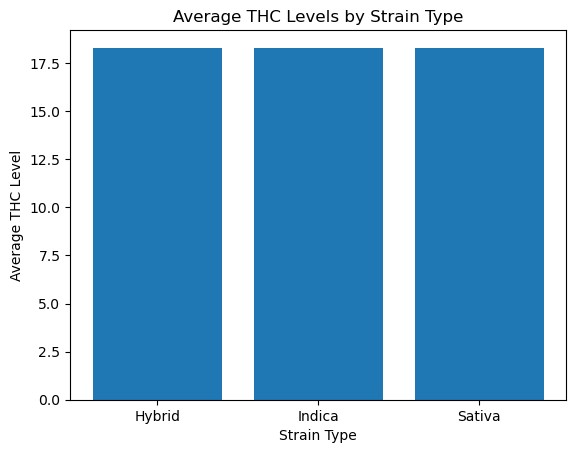

In [12]:
import matplotlib.pyplot as plt

# Create a bar chart of average THC levels by strain type
plt.bar(df_display['type'], df_display['avg_thc_level'])
plt.xlabel('Strain Type')
plt.ylabel('Average THC Level')
plt.title('Average THC Levels by Strain Type')
plt.show()


2. A SCATTER PLOT TO VISUALIZE THE RELATIONSHIP BETWEEN POSITIVE AND NEGATIVE EFFECTS OF STRAINS.

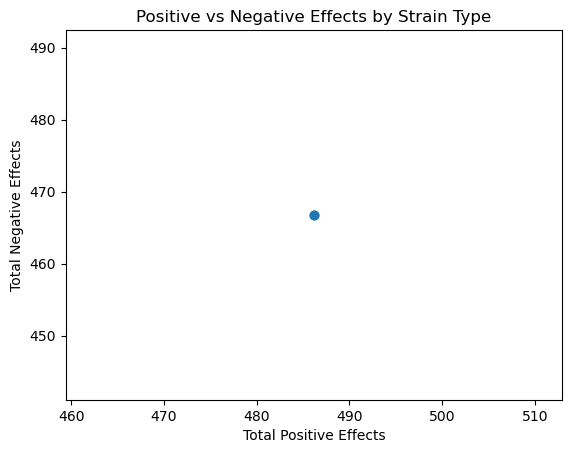

In [13]:
# Create a scatter plot of total positive and negative effects by strain type
plt.scatter(df_display['total_positive'], df_display['total_negative'])
plt.xlabel('Total Positive Effects')
plt.ylabel('Total Negative Effects')
plt.title('Positive vs Negative Effects by Strain Type')
plt.show()
